# Preparing Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import Lasso

In [ ]:
df = pd.read_sas('/content/icu_base_demo_lab_proc_dx4.sas7bdat')
df.head()

In [ ]:
df

,subject_id,hadm_id,admittime,dischtime,hosp_start_date,hosp_end_date,icu_in1,icu_out1,ICU_los,hosp_los,...,Creatinine,Sodium,Potassium,Chloride,Hemoglobin,ECMO,IABP,Impella,Tandem_heart,mech_cir_supp
0,10001217.0,24597018.0,2157-11-18 22:56:00,2157-11-25 18:00:00,2157-11-18,2157-11-25,2157-11-20,2157-11-21,1.0,7.0,...,0.7,142.0,4.2,108.0,12.5,NaN,NaN,NaN,NaN,0.0
1,10001725.0,25563031.0,2110-04-11 15:08:00,2110-04-14 15:00:00,2110-04-11,2110-04-14,2110-04-11,2110-04-12,1.0,3.0,...,0.8,140.0,3.9,106.0,13.9,NaN,NaN,NaN,NaN,0.0
2,10002348.0,22725460.0,2112-11-30 22:22:00,2112-12-10 17:56:00,2112-11-30,2112-12-10,2112-11-30,2112-12-10,10.0,10.0,...,0.8,142.0,4.8,107.0,13.0,NaN,NaN,NaN,NaN,0.0
3,10002443.0,21329021.0,2183-10-17 23:20:00,2183-10-20 18:47:00,2183-10-17,2183-10-20,2183-10-18,2183-10-20,2.0,3.0,...,0.9,135.0,5.3,106.0,14.4,NaN,NaN,NaN,NaN,0.0
4,10002495.0,24982426.0,2141-05-22 20:17:00,2141-05-29 17:41:00,2141-05-22,2141-05-29,2141-05-22,2141-05-27,5.0,7.0,...,1.4,129.0,4.1,96.0,14.0,NaN,126.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34147,19997886.0,20793010.0,2186-11-12 07:10:00,2186-12-10 20:35:00,2186-11-12,2186-12-10,2186-12-06,2186-12-08,2.0,28.0,...,0.8,136.0,4.5,96.0,10.3,NaN,NaN,NaN,NaN,0.0
34148,19998843.0,24842066.0,2187-02-05 09:27:00,2187-02-08 17:28:00,2187-02-05,2187-02-08,2187-02-05,2187-02-08,3.0,3.0,...,1.2,133.0,5.5,106.0,13.1,NaN,NaN,NaN,NaN,0.0
34149,19999068.0,21606769.0,2161-08-24 04:10:00,2161-09-02 19:00:00,2161-08-24,2161-09-02,2161-08-24,2161-08-30,6.0,9.0,...,0.8,136.0,3.6,100.0,12.5,NaN,NaN,NaN,NaN,0.0
34150,19999297.0,21439025.0,2162-08-14 23:55:00,2162-08-23 04:16:00,2162-08-14,2162-08-23,2162-08-16,2162-08-23,7.0,9.0,...,0.5,131.0,3.4,95.0,11.8,NaN,NaN,NaN,NaN,0.0


In [ ]:
#Exclude patients with no record of NT-proBNP

df=df[df['BNP'].isna()==False]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
#No records of echocardiography

In [ ]:
for i in sorted(df.columns):
  print(i)
  #find which ones that can affect death

labels=['hosp_mortality']

variables = ['gender', 'race', 'anchor_age', 'heart_rate', 'resp_rate', 'temp_c',
             'SpO2', 'Art_BP_mean', 'Hemoglobin', 'Platelet_Count', 'WBC', 'BNP',
             'Creatinine', 'BUN', 'Potassium', 'Sodium', 'Chloride','Anion_gap', 'Bicarbonate', 'PH', 'pCO2' ]

In [ ]:
#check the percentage of missing values
for i in variables:
  print(i, df[i].isna().sum()/len(df))

gender 0.0
race 0.0
anchor_age 0.0
heart_rate 0.0013153567905294311
resp_rate 0.001644195988161789
temp_c 0.8730680697139099
SpO2 0.001644195988161789
Art_BP_mean 0.5951989477145676
Hemoglobin 0.004274909569220651
Platelet_Count 0.010851693521867807
WBC 0.007892140743176587
BNP 0.0
Creatinine 0.0009865175928970734
BUN 0.0019730351857941467
Potassium 0.0009865175928970734
Sodium 0.0006576783952647156
Chloride 0.0006576783952647156
Anion_gap 0.013482407102926669
Bicarbonate 0.0009865175928970734
PH 0.16376192042091417
pCO2 0.17888852351200263


In [ ]:
df['hosp_mortality'].isna().sum()/len(df)

0.0

In [ ]:
# Exclude temp_c, Art_BP_mean since missing values >25%. Split the dataframe into one to fill missing values, and one to convert categorical features
df_to_fill=df[['heart_rate', 'resp_rate','SpO2', 'BNP', 'anchor_age',
       'Hemoglobin', 'Platelet_Count', 'WBC', 'Creatinine', 'BUN', 'Potassium',
       'Sodium', 'Chloride','Anion_gap', 'Bicarbonate', 'PH', 'pCO2']]
df_labels=df[labels]
df_to_encode=df[['gender', 'race']]

In [ ]:
#replace missing values with the median
for i in df_to_fill:
  df_to_fill[i].fillna(value=df_to_fill[i].median(), inplace=True)

In [ ]:
df_to_fill

,heart_rate,resp_rate,SpO2,BNP,anchor_age,Hemoglobin,Platelet_Count,WBC,Creatinine,BUN,Potassium,Sodium,Chloride,Anion_gap,Bicarbonate,PH,pCO2
0,106.0,12.0,85.0,110.0,53.0,14.4,307.0,20.7,0.9,20.0,5.3,135.0,106.0,12.0,18.0,7.27,49.0
1,123.0,29.0,100.0,1405.0,53.0,9.1,304.0,3.7,0.3,5.0,3.4,139.0,102.0,13.0,28.0,7.38,41.0
2,85.0,14.0,96.0,658.0,56.0,13.6,133.0,9.4,1.5,27.0,3.9,136.0,101.0,14.0,25.0,7.38,41.0
3,66.0,14.0,90.0,24762.0,82.0,7.6,236.0,15.2,2.9,47.0,5.1,143.0,113.0,13.0,13.0,7.24,44.0
4,124.0,32.0,97.0,44309.0,78.0,9.4,134.0,7.4,1.0,30.0,6.8,134.0,105.0,19.0,15.0,7.38,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,74.0,26.0,95.0,612.0,70.0,12.7,163.0,4.6,1.0,18.0,7.4,133.0,100.0,16.0,21.0,7.38,41.0
3037,101.0,26.0,96.0,4648.0,91.0,13.2,168.0,15.6,0.8,19.0,4.7,142.0,101.0,17.0,26.0,7.38,52.0
3038,58.0,20.0,98.0,500.0,68.0,10.9,173.0,15.8,1.2,16.0,4.4,142.0,110.0,12.0,24.0,7.14,54.0
3039,100.0,22.0,98.0,25207.0,82.0,8.9,264.0,8.1,1.5,47.0,4.1,136.0,101.0,20.0,21.0,7.34,39.0


In [ ]:
#Encode the categorical values

In [ ]:
encoder= OneHotEncoder()
encoded=encoder.fit_transform(df_to_encode)
encoded_df = pd.DataFrame(encoded.toarray())


encoded_df.columns = encoder.get_feature_names_out()
encoded_df

In [ ]:
# Combine the datasets
df_variables=pd.concat([df_to_fill, encoded_df], axis='columns')

In [ ]:
df_variables

,heart_rate,resp_rate,SpO2,BNP,anchor_age,Hemoglobin,Platelet_Count,WBC,Creatinine,BUN,...,race_b'PATIENT DECLINED TO ANSWER',race_b'PORTUGUESE',race_b'SOUTH AMERICAN',race_b'UNABLE TO OBTAIN',race_b'UNKNOWN',race_b'WHITE',race_b'WHITE - BRAZILIAN',race_b'WHITE - EASTERN EUROPEAN',race_b'WHITE - OTHER EUROPEAN',race_b'WHITE - RUSSIAN'
0,106.0,12.0,85.0,110.0,53.0,14.4,307.0,20.7,0.9,20.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,123.0,29.0,100.0,1405.0,53.0,9.1,304.0,3.7,0.3,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,85.0,14.0,96.0,658.0,56.0,13.6,133.0,9.4,1.5,27.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,66.0,14.0,90.0,24762.0,82.0,7.6,236.0,15.2,2.9,47.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,124.0,32.0,97.0,44309.0,78.0,9.4,134.0,7.4,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,74.0,26.0,95.0,612.0,70.0,12.7,163.0,4.6,1.0,18.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3037,101.0,26.0,96.0,4648.0,91.0,13.2,168.0,15.6,0.8,19.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3038,58.0,20.0,98.0,500.0,68.0,10.9,173.0,15.8,1.2,16.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3039,100.0,22.0,98.0,25207.0,82.0,8.9,264.0,8.1,1.5,47.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# XGBoost

In [ ]:
# start preparing data for xgboost
X=df_variables.values
y=df_labels.values

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

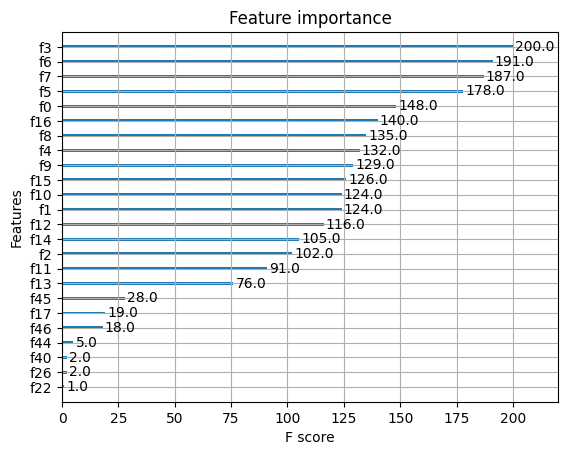

In [ ]:
xgb.plot_importance(xgb_model)

As we can see, the top 20 features are f3, f6, f7, f5, f0, f16, f8, f4, f9, f15, f10, f1, f12, f14, f2, f11, f13, f45, f17, and f46.

In [ ]:
xg_variables=[]
features_xg=[3,6,7,5,0,16,8,4,9,15,10,1,12,14,2,11,13,45,17,46]
for i, x in enumerate(df_variables.columns):
  if i in features_xg:
    xg_variables.append(x)
xg_variables

['heart_rate',
 'resp_rate',
 'SpO2',
 'BNP',
 'anchor_age',
 'Hemoglobin',
 'Platelet_Count',
 'WBC',
 'Creatinine',
 'BUN',
 'Potassium',
 'Sodium',
 'Chloride',
 'Anion_gap',
 'Bicarbonate',
 'PH',
 'pCO2',
 "gender_b'F'",
 "race_b'UNKNOWN'",
 "race_b'WHITE'"]

In [ ]:
df_variables_xg=df_variables[xg_variables]

In [ ]:
df_variables_xg

,heart_rate,resp_rate,SpO2,BNP,anchor_age,Hemoglobin,Platelet_Count,WBC,Creatinine,BUN,Potassium,Sodium,Chloride,Anion_gap,Bicarbonate,PH,pCO2,gender_b'F',race_b'UNKNOWN',race_b'WHITE'
0,106.0,12.0,85.0,110.0,53.0,14.4,307.0,20.7,0.9,20.0,5.3,135.0,106.0,12.0,18.0,7.27,49.0,0.0,0.0,1.0
1,123.0,29.0,100.0,1405.0,53.0,9.1,304.0,3.7,0.3,5.0,3.4,139.0,102.0,13.0,28.0,7.38,41.0,1.0,0.0,1.0
2,85.0,14.0,96.0,658.0,56.0,13.6,133.0,9.4,1.5,27.0,3.9,136.0,101.0,14.0,25.0,7.38,41.0,0.0,0.0,1.0
3,66.0,14.0,90.0,24762.0,82.0,7.6,236.0,15.2,2.9,47.0,5.1,143.0,113.0,13.0,13.0,7.24,44.0,1.0,1.0,0.0
4,124.0,32.0,97.0,44309.0,78.0,9.4,134.0,7.4,1.0,30.0,6.8,134.0,105.0,19.0,15.0,7.38,41.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,74.0,26.0,95.0,612.0,70.0,12.7,163.0,4.6,1.0,18.0,7.4,133.0,100.0,16.0,21.0,7.38,41.0,0.0,0.0,1.0
3037,101.0,26.0,96.0,4648.0,91.0,13.2,168.0,15.6,0.8,19.0,4.7,142.0,101.0,17.0,26.0,7.38,52.0,1.0,0.0,1.0
3038,58.0,20.0,98.0,500.0,68.0,10.9,173.0,15.8,1.2,16.0,4.4,142.0,110.0,12.0,24.0,7.14,54.0,0.0,1.0,0.0
3039,100.0,22.0,98.0,25207.0,82.0,8.9,264.0,8.1,1.5,47.0,4.1,136.0,101.0,20.0,21.0,7.34,39.0,1.0,0.0,1.0


# Logistic Regression with XGBoost

start doing multivariate logistic regression

In [ ]:
sc = StandardScaler()
sc.fit(df_variables_xg)
X_xg = sc.transform(df_variables_xg)

In [ ]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X_xg, y, test_size=0.3, random_state=0)

In [ ]:
lr = LogisticRegression(C=10, random_state=0)
lr.fit(X_train_xg, y_train_xg)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, random_state=0)

In [ ]:
print(df_variables_xg.columns,lr.coef_)

Index(['heart_rate', 'resp_rate', 'SpO2', 'BNP', 'anchor_age', 'Hemoglobin',
       'Platelet_Count', 'WBC', 'Creatinine', 'BUN', 'Potassium', 'Sodium',
       'Chloride', 'Anion_gap', 'Bicarbonate', 'PH', 'pCO2', 'gender_b'F'',
       'race_b'UNKNOWN'', 'race_b'WHITE''],
      dtype='object') [[ 0.06399793  0.12955737 -0.18373094  0.1587175   0.41437001 -0.25298512
  -0.09157467  0.1933272  -0.42995149  0.25604124  0.0656931  -0.06334904
   0.12960943  0.23314299 -0.01629357 -0.29743978 -0.1336328  -0.05088691
   0.2613456   0.01738088]]


In [ ]:
lr.intercept_

array([-1.89185854])

In [ ]:
names_of_variables =np.array(xg_variables)

weights = lr.coef_.reshape(20)
abs_weights = np.abs(weights)

sorted_index = np.flip(np.argsort(abs_weights))

top_7 = sorted_index[:7]

print(names_of_variables[top_7], weights[top_7], sorted_index)

['Creatinine' 'anchor_age' 'PH' "race_b'UNKNOWN'" 'BUN' 'Hemoglobin'
 'Anion_gap'] [-0.42995149  0.41437001 -0.29743978  0.2613456   0.25604124 -0.25298512
  0.23314299] [ 8  4 15 18  9  5 13  7  2  3 16 12  1  6 10  0 11 17 19 14]


# Create prediction model with XGBoost

In [ ]:
X_train_xg

array([[-0.45754373, -0.19182232, -0.24001439, ...,  1.05372674,
        -0.47145189,  0.77983578],
       [-1.18908446, -0.78268751,  0.98011893, ...,  1.05372674,
        -0.47145189,  0.77983578],
       [-0.27465854, -0.78268751,  0.98011893, ...,  1.05372674,
        -0.47145189,  0.77983578],
       ...,
       [-1.18908446, -0.48725491, -0.24001439, ...,  1.05372674,
        -0.47145189, -1.28232126],
       [-1.23480575,  0.39904288,  0.98011893, ..., -0.94901264,
        -0.47145189,  0.77983578],
       [-0.96047798, -1.2258364 ,  0.73609227, ..., -0.94901264,
         2.12110722, -1.28232126]])

In [ ]:

def pred_model_xg(array,m):
  odds=[]
  for i in range(len(array)):
    num=i
    Creatinine = array[num][8]
    anchor_age = array[num][4]
    PH = array[num][15]
    race_b_UNKNOWN = array[num][18]
    BUN = array[num][9]
    Hemoglobin = array[num][5]
    Anion_gap = array[num][13]
    k=(-1.89185854+(Creatinine*-0.42995149)+(anchor_age*0.41437001)+
    (PH*-0.29743978)+(race_b_UNKNOWN*0.2613456)+(BUN*0.25604124)+
      (Hemoglobin*-0.25298512)+(Anion_gap*0.23314299))
    k=(1/(1+np.exp(-k)))
    if k>m:
      odds.append(1)
    else:
      odds.append(0)

  return np.array(odds).reshape(913,1)


In [ ]:
X_test_xg

array([[ 1.46275069,  0.39904288, -1.21612104, ...,  1.05372674,
         2.12110722, -1.28232126],
       [ 0.82265255, -0.63497121,  0.73609227, ...,  1.05372674,
        -0.47145189, -1.28232126],
       [ 0.68548867,  1.43305696, -0.48404105, ...,  1.05372674,
        -0.47145189,  0.77983578],
       ...,
       [ 0.50260348, -0.33953861, -0.97209437, ...,  1.05372674,
        -0.47145189,  0.77983578],
       [-0.32037984, -0.48725491, -0.48404105, ...,  1.05372674,
        -0.47145189,  0.77983578],
       [ 1.05125903,  0.54675917,  0.73609227, ...,  1.05372674,
        -0.47145189,  0.77983578]])

In [ ]:
for i in pred_model_xg(X_test_xg)[:34]:
  print(i)

In [ ]:
y_test_xg[32]

array([1.])

In [ ]:
l=[]
for i in range(0,101):
  l.append((accuracy_score(y_test_xg, pred_model_xg(X_test_xg, i/100)),i))

In [ ]:
max(l)

(0.8400876232201533, 46)

# LASSO

In [ ]:
model = Lasso(alpha=0.01)
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
sc = StandardScaler()
sc.fit(X)
lasso_scaled=sc.transform(X)

In [ ]:
(X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso) = train_test_split(lasso_scaled, y, test_size=0.3, random_state=42)

In [ ]:
lasso_model=model.fit(X_train_lasso, y_train_lasso)

In [ ]:
lasso_weights=lasso_model.coef_

In [ ]:
names_of_variables =np.array(df_variables.columns)

weights = lasso_weights
abs_weights = np.abs(weights)

sorted_index = np.flip(np.argsort(abs_weights))

top_20 = sorted_index[:20]

print(names_of_variables[top_20], weights[top_20], sorted_index)

["race_b'UNKNOWN'" 'WBC' 'Anion_gap' 'BNP' 'anchor_age' 'Hemoglobin'
 'SpO2' 'BUN' 'Bicarbonate' 'Creatinine' 'Platelet_Count' 'resp_rate' 'PH'
 'Potassium' "race_b'ASIAN - CHINESE'" 'heart_rate'
 "race_b'ASIAN - KOREAN'" "race_b'UNABLE TO OBTAIN'" "race_b'ASIAN'"
 "race_b'BLACK/CAPE VERDEAN'"] [ 0.03244243  0.02655827  0.02621629  0.0245703   0.02362019 -0.01940373
 -0.01769187  0.01696544 -0.01344108 -0.01130307 -0.01116795  0.00857823
 -0.00666043  0.00653079 -0.00209308  0.00188294  0.00178627  0.00101244
 -0.00019675 -0.00010947] [45  7 13  3  4  5  2  9 14  8  6  1 15 10 22  0 23 44 20 27 12 11 16 17
 18 19 21 50 24 37 48 47 46 43 42 41 40 39 38 36 49 35 34 33 32 31 30 29
 28 26 25]


In [ ]:
lasso_variables=list(names_of_variables[top_20])

In [ ]:
df_variables_lasso=df_variables[lasso_variables]

In [ ]:
df_variables_lasso

,race_b'UNKNOWN',WBC,Anion_gap,BNP,anchor_age,Hemoglobin,SpO2,BUN,Bicarbonate,Creatinine,Platelet_Count,resp_rate,PH,Potassium,race_b'ASIAN - CHINESE',heart_rate,race_b'ASIAN - KOREAN',race_b'UNABLE TO OBTAIN',race_b'ASIAN',race_b'BLACK/CAPE VERDEAN'
0,0.0,20.7,12.0,110.0,53.0,14.4,85.0,20.0,18.0,0.9,307.0,12.0,7.27,5.3,0.0,106.0,0.0,0.0,0.0,0.0
1,0.0,3.7,13.0,1405.0,53.0,9.1,100.0,5.0,28.0,0.3,304.0,29.0,7.38,3.4,0.0,123.0,0.0,0.0,0.0,0.0
2,0.0,9.4,14.0,658.0,56.0,13.6,96.0,27.0,25.0,1.5,133.0,14.0,7.38,3.9,0.0,85.0,0.0,0.0,0.0,0.0
3,1.0,15.2,13.0,24762.0,82.0,7.6,90.0,47.0,13.0,2.9,236.0,14.0,7.24,5.1,0.0,66.0,0.0,0.0,0.0,0.0
4,0.0,7.4,19.0,44309.0,78.0,9.4,97.0,30.0,15.0,1.0,134.0,32.0,7.38,6.8,0.0,124.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,0.0,4.6,16.0,612.0,70.0,12.7,95.0,18.0,21.0,1.0,163.0,26.0,7.38,7.4,0.0,74.0,0.0,0.0,0.0,0.0
3037,0.0,15.6,17.0,4648.0,91.0,13.2,96.0,19.0,26.0,0.8,168.0,26.0,7.38,4.7,0.0,101.0,0.0,0.0,0.0,0.0
3038,1.0,15.8,12.0,500.0,68.0,10.9,98.0,16.0,24.0,1.2,173.0,20.0,7.14,4.4,0.0,58.0,0.0,0.0,0.0,0.0
3039,0.0,8.1,20.0,25207.0,82.0,8.9,98.0,47.0,21.0,1.5,264.0,22.0,7.34,4.1,0.0,100.0,0.0,0.0,0.0,0.0


# Logistic Regression with LASSO

In [ ]:
sc = StandardScaler()
sc.fit(df_variables_lasso)
X_lasso=sc.transform(df_variables_lasso)

In [ ]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y, test_size=0.3, random_state=0)

In [ ]:
lr_lasso = LogisticRegression(C=10, random_state=0)
lr_lasso.fit(X_train_lasso, y_train_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, random_state=0)

In [ ]:
lr_lasso.coef_

array([[ 0.24506568,  0.1888943 ,  0.2116648 ,  0.15105317,  0.418747  ,
        -0.25425669, -0.17849968,  0.25910058, -0.16213433, -0.42412179,
        -0.09266975,  0.13729928, -0.21947239,  0.05805655, -0.03272085,
         0.05383368,  0.06208621,  0.11134102, -0.14086431, -0.37316953]])

In [ ]:
lr_lasso.intercept_

array([-1.9218661])

In [ ]:
names_of_variables =np.array(lasso_variables)

weights = lr_lasso.coef_.reshape(20)
abs_weights = np.abs(weights)

sorted_index = np.flip(np.argsort(abs_weights))

top_8 = sorted_index[:8]

print(names_of_variables[top_8], weights[top_8], sorted_index)

['Creatinine' 'anchor_age' "race_b'BLACK/CAPE VERDEAN'" 'BUN' 'Hemoglobin'
 "race_b'UNKNOWN'" 'PH' 'Anion_gap'] [-0.42412179  0.418747   -0.37316953  0.25910058 -0.25425669  0.24506568
 -0.21947239  0.2116648 ] [ 9  4 19  7  5  0 12  2  1  6  8  3 18 11 17 10 16 13 15 14]


# create LASSO prediction model

In [ ]:
X_train_lasso

array([[-0.47145189, -0.56525543, -0.52625018, ..., -0.12116661,
        -0.10312498, -0.06025249],
       [-0.47145189,  0.04922416, -1.00718987, ..., -0.12116661,
        -0.10312498, -0.06025249],
       [-0.47145189, -0.42026586, -0.28578034, ..., -0.12116661,
        -0.10312498, -0.06025249],
       ...,
       [-0.47145189, -0.2545635 ,  0.19515935, ..., -0.12116661,
        -0.10312498, -0.06025249],
       [-0.47145189,  0.27016065,  0.19515935, ..., -0.12116661,
        -0.10312498, -0.06025249],
       [ 2.12110722, -0.16480805, -1.48812955, ..., -0.12116661,
        -0.10312498, -0.06025249]])

In [ ]:
df_variables_lasso

,race_b'UNKNOWN',WBC,Anion_gap,BNP,anchor_age,Hemoglobin,SpO2,BUN,Bicarbonate,Creatinine,Platelet_Count,resp_rate,PH,Potassium,race_b'ASIAN - CHINESE',heart_rate,race_b'ASIAN - KOREAN',race_b'UNABLE TO OBTAIN',race_b'ASIAN',race_b'BLACK/CAPE VERDEAN'
0,0.0,20.7,12.0,110.0,53.0,14.4,85.0,20.0,18.0,0.9,307.0,12.0,7.27,5.3,0.0,106.0,0.0,0.0,0.0,0.0
1,0.0,3.7,13.0,1405.0,53.0,9.1,100.0,5.0,28.0,0.3,304.0,29.0,7.38,3.4,0.0,123.0,0.0,0.0,0.0,0.0
2,0.0,9.4,14.0,658.0,56.0,13.6,96.0,27.0,25.0,1.5,133.0,14.0,7.38,3.9,0.0,85.0,0.0,0.0,0.0,0.0
3,1.0,15.2,13.0,24762.0,82.0,7.6,90.0,47.0,13.0,2.9,236.0,14.0,7.24,5.1,0.0,66.0,0.0,0.0,0.0,0.0
4,0.0,7.4,19.0,44309.0,78.0,9.4,97.0,30.0,15.0,1.0,134.0,32.0,7.38,6.8,0.0,124.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,0.0,4.6,16.0,612.0,70.0,12.7,95.0,18.0,21.0,1.0,163.0,26.0,7.38,7.4,0.0,74.0,0.0,0.0,0.0,0.0
3037,0.0,15.6,17.0,4648.0,91.0,13.2,96.0,19.0,26.0,0.8,168.0,26.0,7.38,4.7,0.0,101.0,0.0,0.0,0.0,0.0
3038,1.0,15.8,12.0,500.0,68.0,10.9,98.0,16.0,24.0,1.2,173.0,20.0,7.14,4.4,0.0,58.0,0.0,0.0,0.0,0.0
3039,0.0,8.1,20.0,25207.0,82.0,8.9,98.0,47.0,21.0,1.5,264.0,22.0,7.34,4.1,0.0,100.0,0.0,0.0,0.0,0.0


In [ ]:

def pred_model_lasso(array):#,m):
  odds=[]
  for i in range(len(array)):
    num=i
    Creatinine = array[num][9]
    anchor_age = array[num][4]
    race_b_BLACK = array[num][19]
    BUN = array[num][7]
    Hemoglobin = array[num][5]
    race_b_UNKNOWN = array[num][0]
    PH = array[num][12]
    Anion_gap = array[num][2]
    k=(-1.9218661+(Creatinine*-0.42412179)+(anchor_age*0.418747)+
    (race_b_BLACK*-0.37316953)+(race_b_UNKNOWN*0.24506568)+(BUN*0.25910058)+
      (Hemoglobin*-0.25425669)+(Anion_gap*0.2116648)+(PH*-0.21947239))
    k=(1/(1+np.exp(-k)))
    '''
    if k>m:
      odds.append(1)
    else:
      odds.append(0)
    '''
    odds.append(k)

  return np.array(odds).reshape(913,1)

In [ ]:
for i in pred_model_lasso(X_test_lasso):
  print(i)

In [ ]:
l=[]
for i in range(0,101):
  l.append((accuracy_score(y_test_lasso, pred_model_lasso(X_test_lasso, i/100)),i))

In [ ]:
max(l)

(0.8389923329682366, 63)